In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import models.data as models

In [19]:
female_df = pd.read_csv("C:/School/BigData/Big_Data/female.csv")
df = female_df[['buttockcircumference', 'waistcircumference']]
df['buttockcircumference'] = df['buttockcircumference'].multiply(0.1)
df['waistcircumference'] = df['waistcircumference'].multiply(0.1)
df.rename(columns={'buttockcircumference':'hipcircumference', 'waistcircumference':'waistcircumference'}, inplace=True)
df.head()

C:\Users\Vice\AppData\Local\Temp\ipykernel_14648\674438039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buttockcircumference'] = df['buttockcircumference'].multiply(0.1)
C:\Users\Vice\AppData\Local\Temp\ipykernel_14648\674438039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waistcircumference'] = df['waistcircumference'].multiply(0.1)
C:\Users\Vice\AppData\Local\Temp\ipykernel_14648\674438039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,hipcircumference,waistcircumference
0,101.1,85.0
1,89.3,70.8
2,98.7,72.7
3,101.2,92.3
4,128.1,116.3


In [20]:
people = []
for row in df.itertuples():
    hipcircumference = row[1]
    waistcircumference = row[2]
    person = models.Female_Pants(hipcircumference, waistcircumference)
    people.append(person)

everyones_size = []
for person in people:
    everyones_size.append(person.size)

df['Size'] = everyones_size
df.tail(100)

C:\Users\Vice\AppData\Local\Temp\ipykernel_14648\4050883112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = everyones_size


,hipcircumference,waistcircumference,Size
1886,97.0,71.5,MEDIUM
1887,92.5,78.3,MEDIUM
1888,94.7,82.7,LARGE
1889,96.5,86.0,LARGE
1890,91.5,72.7,MEDIUM
...,...,...,...
1981,108.9,104.3,XXXLARGE
1982,101.6,97.1,XXLARGE
1983,106.3,98.2,XXLARGE
1984,105.1,83.7,LARGE


In [40]:
user_waist = 85
user_hip = 95.5

deltas = []
for person in people:
    waist_diff = 0.0
    hip_diff = 0.0

# if checks to make sure we always get positive values
    if person.waistbreadth > user_waist:
        waist_diff = person.waistbreadth - user_waist
    else: waist_diff = user_waist - person.waistbreadth

    if person.hipwidth > user_hip:
        hip_diff = person.hipwidth - user_hip
    else: hip_diff = user_hip - person.hipwidth

    waist_diff = waist_diff * waist_diff
    hip_diff = hip_diff * hip_diff

    delta = waist_diff + hip_diff
    #delta = math.sqrt(delta)
    deltas.append(delta)

df['deltapoint'] = deltas
df = df.sort_values(by='deltapoint')
df.head(20)

,hipcircumference,waistcircumference,Size,deltapoint
668,94.3,80.7,LARGE,0.25
450,101.7,84.7,LARGE,0.41
442,107.5,94.6,XXLARGE,0.49
1751,101.5,84.4,LARGE,0.50
1286,100.7,85.1,LARGE,0.61
1488,91.2,78.7,LARGE,0.65
777,102.7,88.9,XLARGE,0.65
1122,100.3,71.5,MEDIUM,0.81
333,103.6,87.1,XLARGE,0.85
1540,104.5,86.0,LARGE,1.01


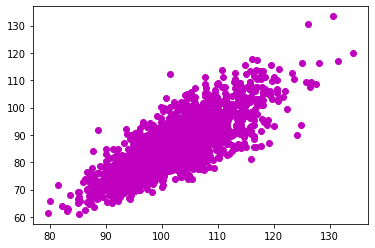

In [39]:
hipcircumferences = []
waistcircumferences = []

for row in df.itertuples():
    hipcircumference = row[1]
    waistcircumference = row[2]
    hipcircumferences.append(hipcircumference)
    waistcircumferences.append(waistcircumference)

plt.plot(hipcircumferences, waistcircumferences, 'mo')
plt.show(4)

In [42]:
k = 10
neighbors = df.head(k)
neighbour_list = []

for row in neighbors.itertuples():
    neighbour = []
    size = row[3]
    distance = row[4]
    neighbour.append(size)
    neighbour.append(distance)
    neighbour_list.append(neighbour)

list_of_sizes = []
for size in neighbour_list:
    list_of_sizes.append(size[0])

most_common_size = max(set(list_of_sizes), key=list_of_sizes.count)
print('Recommended  Size: ' + most_common_size)

Reccomended Size: LARGE
